# data_augmentation

> Fill in a module description here

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import math

import pandas as pd
from fastai.vision.all import *

from singleline_dataset.embeddings import *
from singleline_dataset.display import *
from singleline_dataset.transforms import *
from singleline_dataset.fileorg import *

no env var SINGLELINE_DATA_HOME, defaulting to: None


In [ ]:
EXTERNAL_PARENT_DIR = Path('/Users/al/Dropbox/2-Areas/2-Sketchbooks')
EXTERNAL_SKETCHBOOKS_DIR = EXTERNAL_PARENT_DIR / 'sketchbooks'
EXTERNAL_DATA_HOME = EXTERNAL_PARENT_DIR / 'singleline_data'

In [ ]:
EPOCH = SketchbookEpoch(epoch='20240104', data_home=EXTERNAL_DATA_HOME)

no env var SINGLELINE_DATA_HOME, defaulting to: None


In [ ]:
THRESHOLDED_OUTPUT_DIR = EPOCH.dir_08_THRESHOLDED()
THESHOLDED_TSV_FNAME = EPOCH.tsv_08_THRESHOLDED()
fjdf = pd.read_csv(THESHOLDED_TSV_FNAME, delimiter="\t", index_col="idx")
fjdf.head()

,new_idx,group_fname,group_id,group_num_strokes,group_num_points,indiv_fnamebboxsep_,orig_fname,labelbboxsep_,handlabeled_path,is_new,...,err_msg,indiv_fname,label,emb_csv,knn_dist,knn_clusterid,knn_label,cluster_label,rdp_num_points,rdp_epsilon
idx,,,,,,,,,,,,,,,,,,,,,
0,0,0_drawings/sb55p003g00.png,0,4,1510,sb55p003.jpg,art/sb55p003.jpg,art,0_drawings/sb55p003.jpg,False,...,NaN,sb55p003g00.png,0_drawings,"0.04728329,-0.5714155,-0.73929733,-0.35399058,0.22400337,-0.65341413,0.11710799,-0.4896673,-0.7537334,-0.27084306,-0.43680793,-0.72562873,0.26104796,-0.6266761,-0.68991846,-0.57515705,-0.5467274,-0.6520286,2.2132683,-0.63401383,-0.64108604,0.0068377256,-0.5446661,-0.6779002,-0.40022308,-0.6690378,-0.25018138,-0.5982413,-0.73986673,1.0058696,-0.68509877,-0.67007643,0.5276551,-0.4592305,-0.600525,-0.3091834,-0.73933,-0.57338566,0.84570634,-0.6179389,-0.52985966,0.5803701,0.10534239,-0.6682474,-0.1908136,-0.59257406,-0.6157326,-0.6001429,1.3485551,1.1220317,0.10932493,-0.66552746,0.8113811,1....",196.44476,14,NaN,good,1510,0.0
1,1,0_drawings/sb73p061g00.png,0,2,128,sb73p061.jpg,art/sb73p061.jpg,art,0_drawings/sb73p061.jpg,False,...,NaN,sb73p061g00.png,0_drawings,"-0.6198182,-0.5714155,-0.73929733,-0.6553513,-0.6254566,-0.65341413,-0.7267234,-0.46724933,-0.7537334,0.9455167,-0.62038505,-0.72562873,0.18925023,-0.6266761,0.33996195,-0.15316445,-0.5467274,0.03829068,1.0683823,0.23568732,-0.64108604,-0.55193967,-0.5446661,-0.022136033,1.4963098,-0.4510746,-0.4518578,-0.5982413,-0.28755826,0.1980134,-0.68509877,-0.67007643,-0.52171326,-0.19965711,-0.0069928765,-0.46161294,-0.73933,-0.50798476,0.03861904,0.68692446,-0.5830822,0.46990138,1.1344135,-0.6682474,0.6321523,-0.59257406,0.156174,-0.6001429,2.36085,0.16527855,-0.13570255,-0.63657653,0.61075664,0.7...",119.71115,10,NaN,good,128,0.0
5,5,0_drawings/sb73p041g00.png,0,3,702,sb73p041.jpg,art/sb73p041.jpg,art,0_drawings/sb73p041.jpg,False,...,NaN,sb73p041g00.png,0_drawings,"-0.6198182,-0.5714155,-0.73929733,-0.6553513,-0.4395254,-0.65341413,-0.7267234,-0.30100727,-0.7537334,0.6979399,0.5823597,-0.72562873,-0.662768,0.702158,-0.6232817,-0.57515705,-0.22156492,-0.07576728,-0.25915077,0.7949797,-0.5030652,-0.55193967,-0.5446661,-0.6779002,-0.57759243,-0.6690378,-0.4518578,0.8875855,-0.73986673,0.2878165,-0.68509877,-0.67007643,-0.52171326,-0.20293939,-0.600525,0.28690326,-0.73933,0.13321829,-0.65925777,-0.6179389,-0.61049384,-0.58021957,-0.6189488,-0.6682474,-0.75794554,-0.59257406,0.2206502,-0.6001429,-0.3428496,-0.37840372,-0.59497476,-0.66552746,-0.6482407,0....",285.93152,8,NaN,good,702,0.0
6,6,0_drawings/sb73p041g01.png,1,1,205,sb73p041.jpg,art/sb73p041.jpg,art,0_drawings/sb73p041.jpg,False,...,NaN,sb73p041g01.png,0_drawings,"-0.6198182,-0.5714155,-0.73929733,-0.6553513,0.058876395,-0.65341413,-0.7267234,-0.42173523,-0.7537334,0.7433976,0.19966531,-0.72562873,0.62771916,-0.6266761,-0.68991846,-0.57515705,-0.5467274,1.5417054,2.402433,-0.6497359,-0.64108604,-0.4386818,-0.5446661,-0.6779002,-0.57759243,-0.6690378,-0.4518578,0.11702931,-0.73986673,-0.45211998,-0.68509877,-0.67007643,-0.52171326,0.34430972,-0.48163074,-0.6186755,-0.73933,0.040438354,-0.65925777,0.7474549,-0.61049384,0.30740798,1.8930382,-0.6682474,-0.75794554,-0.59257406,-0.3586682,0.89375025,-0.651804,0.08712256,1.415978,-0.66552746,-0.6482407,-0....",179.57721,8,NaN,good,205,0.0
10,10,0_drawings/sb55p080g00.png,0,4,1462,sb55p080.jpg,art/sb55p080.jpg,art,0_drawings/sb55p080.jpg,False,...,NaN,sb55p080g00.png,0_drawings,"-0.6198182,-0.5714155,-0.12864059,-0.6553513,0.03367281,-0.3521561,-0.7267234,-0.47485968,-0.7537334,-0.42715576,1.136474,-0.72562873,2.6017675,-0.6266761,-0.68991846,-0.57515705,-0.5467274,1.0752423,-0.02930379,1.118658,0.39956325,-0.55193967,-0.5446661,-0.6779002,-0.57759243,-0.6690378,-0.4518578,0.16788304,-0.42450532,-0.45211998,-0.68509877,-0.67007643,-0.23189741,0.37339267,1.0403941,0.11935049,-0.73933,-0.19533288,1.3258636,-0.53331745,-0.61049384,1.4947255,0.25517285,-0.59559596,-0.75794554,-0.5

In [ ]:
THRESHOLDED_NPZ_ALL = THRESHOLDED_OUTPUT_DIR / 'furtherfiltered_all.npz'
ds = np.load(THRESHOLDED_NPZ_ALL, encoding='latin1', allow_pickle=True)['arr_0']

### augmentation??

In [ ]:
def augment_strokes(strokes, prob=0.0):
    """Perform data augmentation by randomly dropping out strokes."""
    # drop each point within a line segments with a probability of prob
    # note that the logic in the loop prevents points at the ends to be dropped.
    result = []
    prev_stroke = [0, 0, 1]
    count = 0
    stroke = [0, 0, 1]  # Added to be safe.
    for i in range(len(strokes)):
        candidate = [strokes[i][0], strokes[i][1], strokes[i][2]]
        if candidate[2] == 1 or prev_stroke[2] == 1:
            count = 0
        else:
            count += 1
        urnd = np.random.rand()  # uniform random variable
        if candidate[2] == 0 and prev_stroke[2] == 0 and count > 2 and urnd < prob:
            stroke[0] += candidate[0]
            stroke[1] += candidate[1]
        else:
            stroke = candidate
            prev_stroke = stroke
            result.append(stroke)
    return np.array(result)

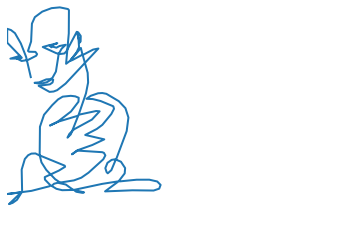

In [ ]:
plot_strokes(deltas_to_strokes(ds[3]))

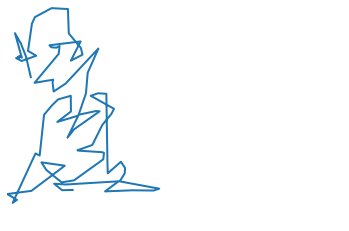

In [ ]:
aug3 = augment_strokes(ds[3], prob=0.6)
plot_strokes(deltas_to_strokes(aug3))

In [ ]:
create_animation(deltas_to_strokes(ds[3]))

197


In [ ]:
show_video('video.mp4')

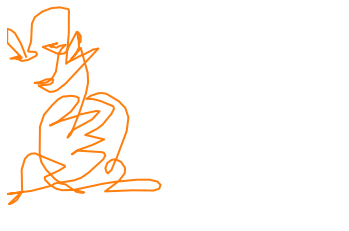

In [ ]:
plot_strokes(points_to_strokes(np.flip(deltas_to_points(ds[3]), axis=0)))

In [ ]:
create_animation(points_to_strokes(np.flip(deltas_to_points(ds[3]), axis=0)))

197


In [ ]:
show_video('video.mp4')

In [ ]:
rot3 = apply_transform(deltas_to_points(ds[3])[:,:2], rotate_xform(-35))

In [ ]:
rot_deltas3 = points_to_deltas(rot3)

In [ ]:
rot_deltas3[:,2] = ds[3][:,2]

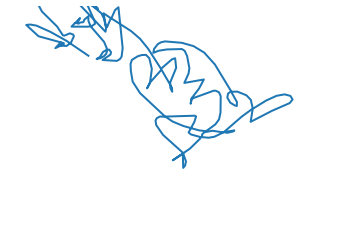

In [ ]:
plot_strokes(deltas_to_strokes(rot_deltas3))

In [ ]:
len(ds)

1550

In [ ]:
incl_flipped = []

for idx in range(len(ds)):
    row = ds[idx]
    flipped_row = points_to_deltas(np.flip(deltas_to_points(row), axis=0))
    incl_flipped.extend([row, flipped_row])

In [ ]:
len(incl_flipped)

3100

In [ ]:
## Todo: code to generate my latest dataset

NUM_AUG = 10
AUG_PROB = 0.5
NUM_DEGREES = 15

In [ ]:
# #| hide
# import nbdev

# nbdev.nbdev_export()